# Capstone Project 2: Lending Club

# Imbalanced Regression

### Import Libraries

In [399]:
import pandas as pd #for building pandas dataframes for analysis
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np #fundamental package for scientific computing with Python

import matplotlib.pyplot as plt #for visualizations
import seaborn as sns #for neat visualizations
import scipy.stats as stats #large number of probability distributions and statistical functions
import statsmodels as sm #provides estimation of many different statistical models, tests and data exploration 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Import Data

In [400]:
#Cleaned Approved Data Separated
approved2 = pd.read_csv('/Users/carolinerosefrensko/Downloads/data_wrangling_json/approved22018-08-14.csv')
approved2.head()

,loan_status_separated,verification_status_separated_0,verification_status_separated_1,grade_separated_1,grade_separated_2,grade_separated_3,grade_separated_4,grade_separated_5,grade_separated_6,grade_separated_7,home_ownership_separated_0,home_ownership_separated_1,emp_length_separated_0,emp_length_separated_1,emp_length_separated_10,emp_length_separated_2,emp_length_separated_3,emp_length_separated_4,emp_length_separated_5,emp_length_separated_6,emp_length_separated_7,emp_length_separated_8,emp_length_separated_9,term_separated_0,term_separated_1
0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [401]:
approved2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314890 entries, 0 to 314889
Data columns (total 25 columns):
loan_status_separated              314890 non-null int64
verification_status_separated_0    314890 non-null int64
verification_status_separated_1    314890 non-null int64
grade_separated_1                  314890 non-null int64
grade_separated_2                  314890 non-null int64
grade_separated_3                  314890 non-null int64
grade_separated_4                  314890 non-null int64
grade_separated_5                  314890 non-null int64
grade_separated_6                  314890 non-null int64
grade_separated_7                  314890 non-null int64
home_ownership_separated_0         314890 non-null int64
home_ownership_separated_1         314890 non-null int64
emp_length_separated_0             314890 non-null int64
emp_length_separated_1             314890 non-null int64
emp_length_separated_10            314890 non-null int64
emp_length_separated_2            

# Over-Sampling Examples:

### Feature Selection

In [402]:
X = approved2.drop('loan_status_separated', axis = 1)
y = approved2.loan_status_separated

In [403]:
approved2.loan_status_separated.head()

0    1
1    0
2    0
3    1
4    0
Name: loan_status_separated, dtype: int64

In [404]:
approved2['loan_status_separated'].value_counts()

1    245493
0     69397
Name: loan_status_separated, dtype: int64

## Class Sizes

In [472]:
from collections import Counter
print(sorted(Counter(y).items()))

[(0, 69397), (1, 245493)]


## Train/Test Split

In [473]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Random Over-sampling

In [474]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)

print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_resampled).items()))

[(0, 48719), (1, 171704)]
[(0, 171704), (1, 171704)]


In [475]:
X_resampled

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 0],
       ..., 
       [1, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0]])

In [476]:
y_resampled

array([0, 0, 0, ..., 0, 0, 0])

### Logistic Regression Test/Train Split for Over-sampling

In [477]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()

model = logreg.fit(X_resampled, y_resampled)
#logreg.fit(X_test, y_test)

In [478]:
y_pred_smote = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.64289


In [479]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_smote)
print(confusion_matrix)

[[14032  6646]
 [27089 46700]]


In [480]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_smote))

             precision    recall  f1-score   support

          0       0.34      0.68      0.45     20678
          1       0.88      0.63      0.73     73789

avg / total       0.76      0.64      0.67     94467



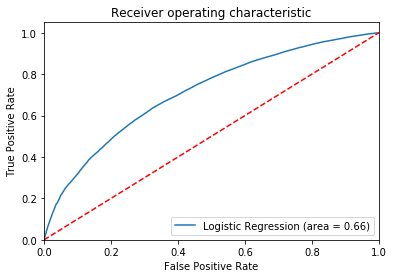

In [414]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Synthetic Minority Oversampling Technique (SMOTE)

In [486]:
X = approved2.drop('loan_status_separated', axis = 1)
y = approved2.loan_status_separated

In [487]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [488]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE(random_state=0)
X_resampled2, y_resampled2 = SMOTE.fit_sample(X_train, y_train)

print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_resampled2).items()))

[(0, 48719), (1, 171704)]
[(0, 171704), (1, 171704)]


In [489]:
X_resampled2

array([[ 0.,  1.,  0., ...,  0.,  0.,  1.],
       [ 0.,  1.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  1.,  0.],
       [ 0.,  1.,  0., ...,  0.,  1.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  1.]])

In [490]:
y_resampled2

array([0, 0, 0, ..., 0, 0, 0])

### Logistic Regression with SMOTE

In [491]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()

model = logreg.fit(X_resampled2, y_resampled2)
#logreg.fit(X_test, y_test)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_smote)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_smote))

Accuracy of logistic regression classifier on test set: 0.64032
[[14032  6646]
 [27089 46700]]
             precision    recall  f1-score   support

          0       0.34      0.68      0.45     20678
          1       0.88      0.63      0.73     73789

avg / total       0.76      0.64      0.67     94467



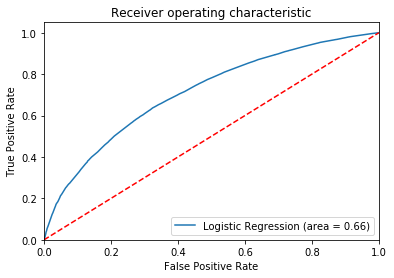

In [492]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Random Under-Sampling

RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes:

In [433]:
X = approved2.drop('loan_status_separated', axis = 1)
y = approved2.loan_status_separated

In [434]:
from collections import Counter
print(sorted(Counter(y).items()))


[(0, 69397), (1, 245493)]


In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [436]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled1, y_resampled1 = rus.fit_sample(X_train, y_train)

print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_resampled1).items()))

[(0, 48719), (1, 171704)]
[(0, 48719), (1, 48719)]


In [438]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_resampled1, y_resampled1)
#logreg.fit(X_test, y_test)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.64352
[[14013  6665]
 [27011 46778]]
             precision    recall  f1-score   support

          0       0.34      0.68      0.45     20678
          1       0.88      0.63      0.74     73789

avg / total       0.76      0.64      0.67     94467



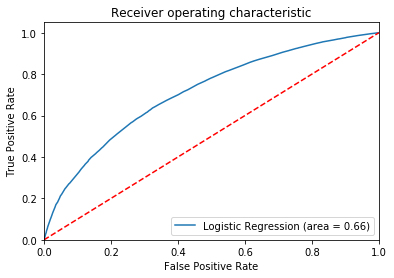

In [428]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Over Sampling with Random Forest

In [456]:
X = approved2.drop('loan_status_separated', axis = 1)
y = approved2.loan_status_separated

In [457]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [458]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)

print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_resampled).items()))

[(0, 48719), (1, 171704)]
[(0, 171704), (1, 171704)]


In [459]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
rf = RandomForestClassifier(n_estimators=10, min_samples_split=2)

rf_result = rf.fit(X_resampled,y_resampled)

rf_pred = rf_result.predict(X_test)
accuracy = accuracy_score(y_test,rf_pred)
accuracy

0.6469666656080959

In [460]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, rf_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

[[13807  6871]
 [26479 47310]]
             precision    recall  f1-score   support

          0       0.34      0.67      0.45     20678
          1       0.87      0.64      0.74     73789

avg / total       0.76      0.65      0.68     94467



## SMOTE with Random Forest

In [461]:
X = approved2.drop('loan_status_separated', axis = 1)
y = approved2.loan_status_separated

In [462]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [463]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE(random_state=0)
X_resampled2, y_resampled2 = SMOTE.fit_sample(X_train, y_train)

print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_resampled2).items()))

[(0, 48719), (1, 171704)]
[(0, 171704), (1, 171704)]


In [464]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
rf = RandomForestClassifier(n_estimators=10, min_samples_split=2)

rf_result = rf.fit(X_resampled2,y_resampled2)

rf_pred = rf_result.predict(X_test)
accuracy = accuracy_score(y_test,rf_pred)
accuracy

0.64731599394497552

In [465]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, rf_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

[[13751  6927]
 [26390 47399]]
             precision    recall  f1-score   support

          0       0.34      0.67      0.45     20678
          1       0.87      0.64      0.74     73789

avg / total       0.76      0.65      0.68     94467



## Random Under-Sampling with Random Forest

In [467]:
X = approved2.drop('loan_status_separated', axis = 1)
y = approved2.loan_status_separated

In [468]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [469]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled1, y_resampled1 = rus.fit_sample(X_train, y_train)

print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_resampled1).items()))

[(0, 48719), (1, 171704)]
[(0, 48719), (1, 48719)]


In [470]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
rf = RandomForestClassifier(n_estimators=10, min_samples_split=2)

rf_result = rf.fit(X_resampled1,y_resampled1)

rf_pred = rf_result.predict(X_test)
accuracy = accuracy_score(y_test,rf_pred)
accuracy

0.64215016884202947

In [471]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, rf_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

[[13905  6773]
 [27032 46757]]
             precision    recall  f1-score   support

          0       0.34      0.67      0.45     20678
          1       0.87      0.63      0.73     73789

avg / total       0.76      0.64      0.67     94467

